<a href="https://colab.research.google.com/github/Tin9oo/-NADO-GUI_Programming/blob/main/sync_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np

# IQ 데이터셋 생성
num_samples = 10000
num_symbols = 4
samples_per_symbol = 16
num_carriers = 64

data = np.random.rand(num_samples, num_carriers, 2)


In [17]:
import tensorflow as tf

# # MLP 모델 구성
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(num_carriers, 2)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(128,)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(data.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),  # 입력 차원을 128로 수정
    tf.keras.layers.Dense(1)
])

# model.compile(loss='mse', optimizer='adam')
# model.fit(input_data, target_data, epochs=100)


In [22]:
# 모델 학습
model.compile(optimizer='adam', loss='mse')
target_data=np.zeros(num_samples)
model.fit(data[:, :, 0], target_data, epochs=10)


Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 3.0927e-05
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 8.8904e-07
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 2.1214e-07
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 1.3258e-07
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3354e-07
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 4.2439e-07
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 5.5685e-07
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 7.4596e-07
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 5.0643e-07
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 5.8827e-07


In [23]:
# 예측 결과 확인
predictions = model.predict(data[:, :, 0])

print(predictions)

313/313 [==============================] - 1s 2ms/step
[[-0.00081556]
 [-0.00076981]
 [-0.00085363]
 ...
 [-0.00061263]
 [-0.0005873 ]
 [-0.00061214]]


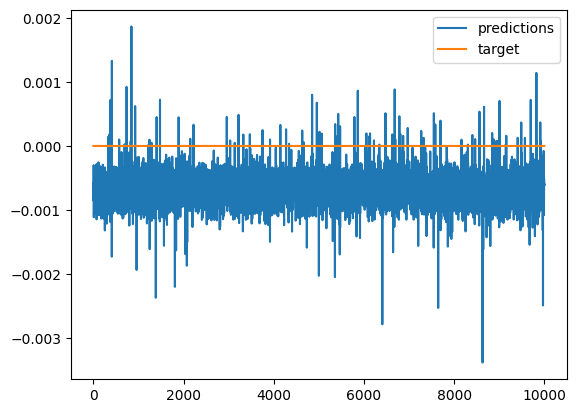

In [24]:
import matplotlib.pyplot as plt

# 예측 결과와 실제 값의 차이를 그래프로 출력
plt.plot(predictions, label='predictions')
plt.plot(target_data, label='target')
plt.legend()
plt.show()
